In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.signal import medfilt

# Informe de practica de reflectancia

En el presente trabajo se realiza una practica de como funciona la reflectancia en función de la longitud de onda para cuatro materiales, los cuales son: Aluminio, cobre, dioxido de cobre y Silicio. 

Para calcular esta reflectancia, primero debemos medir experimentalmente la intensidad del espectro generado al someter el material con una lampara y por medio de este espectro generado podremos calcular la reflectancia en función de la longitud de onda; como los valores pueden verse modificados por el entorno al cual sometemos el experimento, se debe medir los espectros en referencia a un objeto en particular y de la oscuridad dada en el sistema que se trata. 

Se procede a medir el espectro de referencia, el espectro de la oscuridad (esta al tener la lampara apagada) con la referencia conectada y el espectro de los materiales a examinar. Para medir el espectro oscuro lo que hacemos es colocar la fuente UV/Vis apagada sobre el instrumento de medición, debajo del soporte de la sonda colocamos el estándard especular, y se procede a tomar los datos de la intensidad vs la longitud de onda para este fenomeno, luego se realiza exactamente el mismo proceso para medir el espectro de referencia con la unica diferencia que, nuestra fuente UV/Vis estara encendida esta vez; A su vez, se hace el mismo proceso para medir el espectro de cada material colocandolo en el sitio indicado. 

Lo ideal es medir para cada material su oscuro, su referencia y el espectro del material, como se trabaja en un solo laboratorio, estas modificaciones de intensidades de luz no varían demasiado y se puede suponer que el espectro de referencia y el oscuro es el mismo para todas las medidas.

Para el experimento se utiliza una fuente UV/Vis la cual es una lampara halógena de Mercurio-Argón, esta posee segun la empesa desarrolladora un espectro desde los 250 nm hasta los 922 nm.

# Lámpara halógena 

Para la practica de reflectancia se desea trabajar con una lámpara halógena, esta tiene una fuente de Mercurio-Argón.

Para proseguir con la practica de la reflectancia primero tenemos que conocer como se comporta el espectro de nuestra lampara, ya que si bien, este esta marcado en la parte trasera de esta,  el espectro puede verse modificado con el pasar del tiempo y con su uso, caidas u otras cosas. 

In [2]:
#Cargado de datos para la lampara halogena
nombre_lampara =  r'GustavoKevin/HgAr.Master.scope'
f = pd.read_csv(nombre_lampara, sep='\t',skiprows=14, skipfooter=1,engine='python')
I_lampara = np.array(f)[0:-1,1] #Separo los datos de la intensidad del espectro
wld = np.array(f)[0:-1,0]
I_lampara = I_lampara /max(I_lampara) #Normalización del espectro.

## Espectro de la lampara.

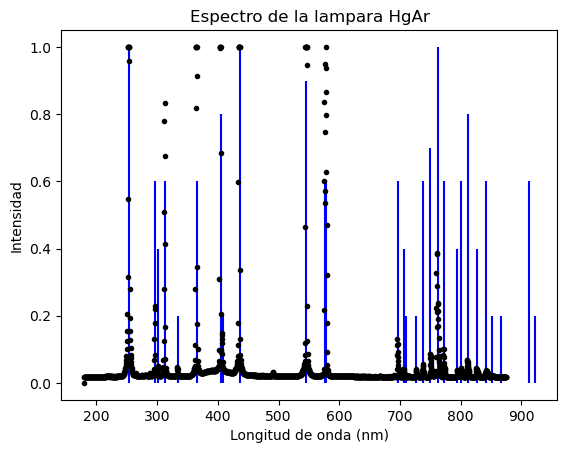

In [3]:
#Picos de la lampara de HgAr
lam = [253.65,296.73,302.15,313.16,334.15,365.01,404.66,407.78,435.85,546.08,576.96,579.07,696.54,706.72,710.75,727.29,738.40,750.39,763.51,772.40,794.82,800.62,811.53,826.45,842.46,852.14,866.79,912.30,922.45]
tam = np.array([5,3,2,3,1,3,4,1,5,4.5,3,3,3,2,1,1,3,3.5,5,3,2,3,4,2,3,1,1,3,1])
tam = tam/max(tam)

plt.figure()

for i in range(len(lam)): 
    plt.vlines(x = lam[i], ymin=0,ymax=tam[i], color='blue')
plt.plot(wld,I_lampara,'k.')
plt.title("Espectro de la lampara HgAr")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Intensidad")
plt.savefig("Espectro de la lampara HgAr.jpg")
plt.show()

En este grafico podemos ver una compración entre los datos tomados por el espectrometro y la lampara halógena, podemos notar como, a partir de aproximadamente 250 nm empezamos a tener una intensidad no tan cercana a cero (puntos negros); ademas, a partir de 850 nuestro espectrometro no mide ninguna longitud de onda relacionada a nuestra fuente de luz, por lo que establecemos que, el rango de medida de reflectancia se hara entre longitudes de onda de 280 nm y 850 nm. 
Ademas es de notar que, algunas intensidades medidas por nuestro sensor, comparadas con las intensidades marcadas por la empresa desarrolladora de la lampara varían, como se puede ver en la imagen, siendo los puntos negros la intensidad medida en el espectrometro y las lineas azules las dadas por la empresa.  

## Espectro de los diferentes materiales.

Cargado de los datos y respectivos filtros para la determinación de la reflectancia.

In [4]:
lim = 300  #Tenemos 300 datos hasta el 280
lim2 = 200 #Tenemos 200 datos despues del 850 
Window_size = 201 

In [5]:
#cargado de la señal oscura de la referencia. 
referencia_dark = r'GustavoKevin/Al.Master.dark'
referencia_luz =  r'GustavoKevin/Al.Master.reference'
nombre_aluminio =  r'GustavoKevin/Al.Master.scope'
nombre_cobre =  r'GustavoKevin/Cu.Master.scope'
nombre_dcobre =  r'GustavoKevin/CuO.Master.scope'
nombre_silicio =  r'GustavoKevin/Si.Master.scope'

In [6]:
f = pd.read_csv(referencia_dark, sep='\t',skiprows=14, skipfooter=1,engine='python')
Ir = np.array(f)[lim:-lim2,1] #Aplico esto para filtrar la segunda fila de los datos. 
wld = np.array(f)[lim:-lim2,0] 
f = pd.read_csv(referencia_luz, sep='\t',skiprows=14, skipfooter=1,engine='python')
Ireferencia = np.array(f)[lim:-lim2,1]
#Aluminio
f = pd.read_csv(nombre_aluminio, sep='\t',skiprows=14, skipfooter=1,engine='python')
Ial = np.array(f)[lim:-lim2,1]
#Cobre
f = pd.read_csv(nombre_cobre, sep='\t',skiprows=14, skipfooter=1,engine='python')
Icu = np.array(f)[lim:-lim2,1]
#Dioxido de cobre
f = pd.read_csv(nombre_dcobre, sep='\t',skiprows=14, skipfooter=1,engine='python')
Icuo = np.array(f)[lim:-lim2,1]
#Silicio
f = pd.read_csv(nombre_silicio, sep='\t',skiprows=14, skipfooter=1,engine='python')
Isi = np.array(f)[lim:-lim2,1]

Se debe, ademas hacer un filtrado al espectro para eliminar posibles ruidos relacionados a objetos de medición como lo es la fibra optica, la lampara y demas. 

In [7]:
#Se hace un filtrado del espectro y la referencia
Ireferencia=medfilt(medfilt(Ireferencia,kernel_size=Window_size))
Ial=medfilt(medfilt(Ial,kernel_size=Window_size))
Icu=medfilt(medfilt(Icu,kernel_size=Window_size))
Icuo=medfilt(medfilt(Icuo,kernel_size=Window_size))
Isi=medfilt(medfilt(Isi,kernel_size=Window_size))

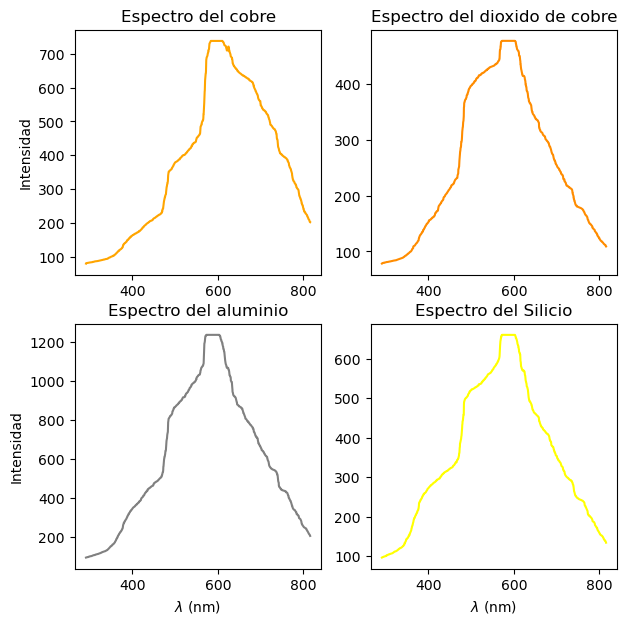

In [8]:
fig, axs = plt.subplots(2,2,figsize=(7,7))
axs[0][0].plot(wld,Icu,color='orange')
axs[0][1].plot(wld,Icuo,color='darkorange')
axs[1][0].plot(wld,Ial,color='gray')
axs[1][1].plot(wld,Isi,color='yellow')
axs[0][0].title.set_text("Espectro del cobre")
axs[0][1].title.set_text("Espectro del dioxido de cobre")
axs[1][0].title.set_text("Espectro del aluminio")
axs[1][1].title.set_text("Espectro del Silicio")
axs[1][1].set_xlabel("$\lambda$ (nm)")
axs[1][0].set_xlabel("$\lambda$ (nm)")
axs[1][0].set_ylabel("Intensidad")
axs[0][0].set_ylabel("Intensidad")
plt.show()

## Reflectancia. 
Para el calculo de la reflectancia, lo que debemos hacer es determinar la relación entre el espectro del material y el espectro de referencia, ademas, a cada uno de estos espectros debemos eliminarle la información del oscuro que poseemos de esta forma: 

$$ R = \frac{I_{objeto} - I_{oscuro}}{I_{referencia} - I_{oscuro}}$$

In [9]:
#Calculo el valor de la reflectancia 
R1 = (Ial-Ir)/(Ireferencia - Ir)
R2 = (Icu-Ir)/(Ireferencia - Ir)
R3 = (Icuo-Ir)/(Ireferencia - Ir)
R4 = (Isi-Ir)/(Ireferencia - Ir)

def graficador_reflectancia(wld,R,wl,r,nombre="Reflectancia de un material",label1="Valores teoricos",label2="Valores experimentales"): 
    plt.figure(figsize=(10,10))
    plt.plot(wl,r,'r',label=label1)
    plt.plot(wld,R,'k.',label=label2)
    plt.grid()
    plt.title(nombre)
    plt.xlim(200,850)
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("Reflectancia")
    plt.legend()
    plt.savefig(nombre+str(".jpg"))
    plt.show()
   

def reflectancia_teorica(n,k):
    sup = (n-1)**2 + k**2
    inf = (n+1)**2 + k**2 
    return sup/inf 



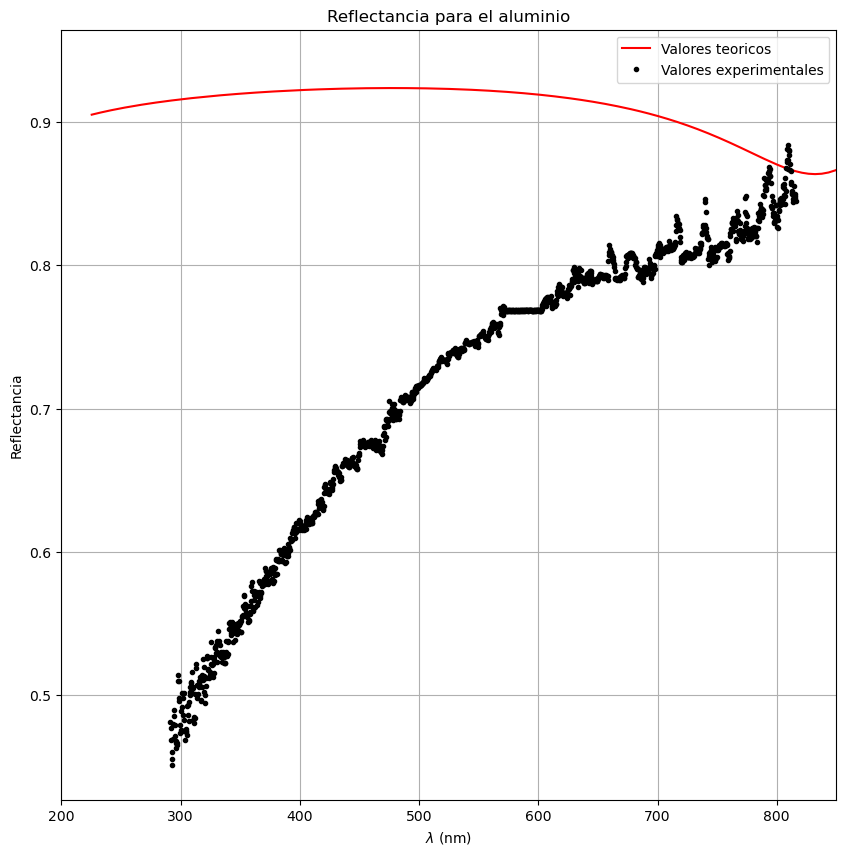

In [10]:
f = np.loadtxt("Aluminio.txt")
f_aluminio = f
r = reflectancia_teorica(f.T[1],f.T[2])
graficador_reflectancia(wld,R1,f.T[0]*1000,r,nombre="Reflectancia para el aluminio")


Figura 2. Grafico de la reflectancia, en rojo los valores teoricos y en negro los datos experimentales. Es bastante notable como, los datos experimentales no se asemejan a los valores teoricos, esto puede deberse a la construcción del material en cuestión y también en el desgaste del mismo. 

Como puede verse en la figura 2, los puntos negros dan cuenta de los datos tomados por el sensor, para este caso el aluminio en cuestión presenta grandes valores de reflectancia a partir de los 500 nm, colores del verde al rojo, para el cual se posee un 70 % de la reflectancia total y sigue incrementando, mientras que para valores inferiores a 500 nm, colores mas frios como lo son los azules tendremos una disminución de la reflectancia. Es de notar que, si bien, se sometieron nuestro datos a un filtro, para eliminar errores, al comparar los datos experimentales con los valores teoricos, estos difieren en gran cantidad, como se puede ver en la imagen el aluminio tiene un porcentaje muy alto de reflectancia (casi superior al 90% para todo el espectro entre 300 y 900 nm), esta variación entre los valores teoricos y los experimentales puede deberse a que el aluminio utilizado, este compuesto por algunas impurezas, a su vez, a la hora de medir este la superficie cubierta de polvo, la cual puede modificar su medida y por otro lado,  

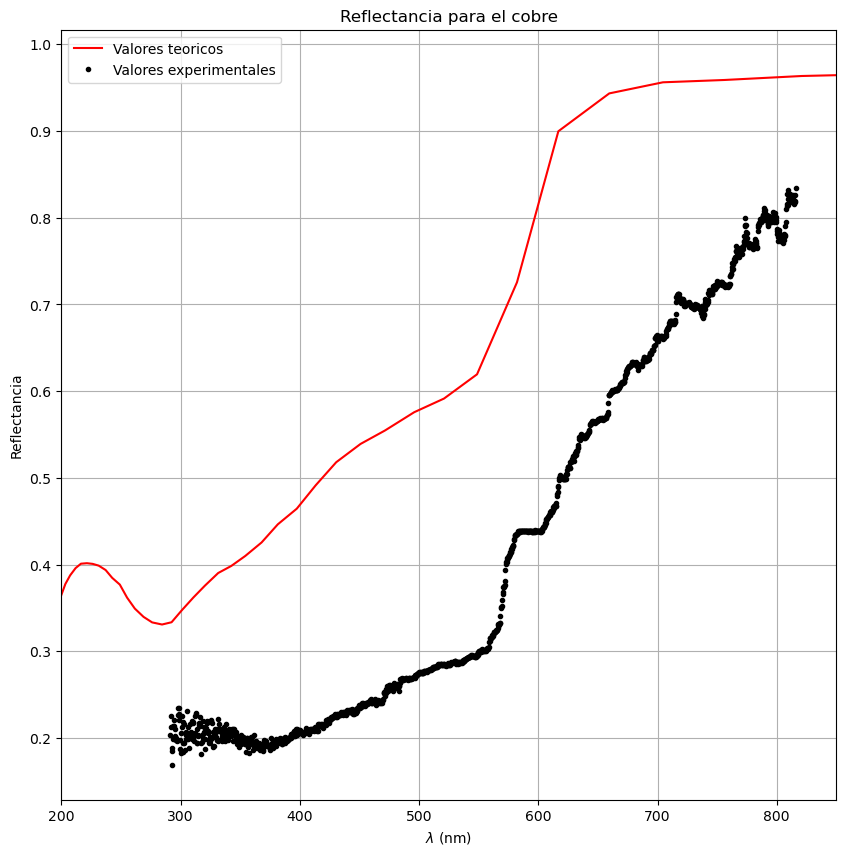

In [11]:
f = np.loadtxt("Cobre.txt")
f_cobre = f 
r = reflectancia_teorica(f.T[1],f.T[2])
graficador_reflectancia(wld,R2,f.T[0]*1000,r,nombre="Reflectancia para el cobre")

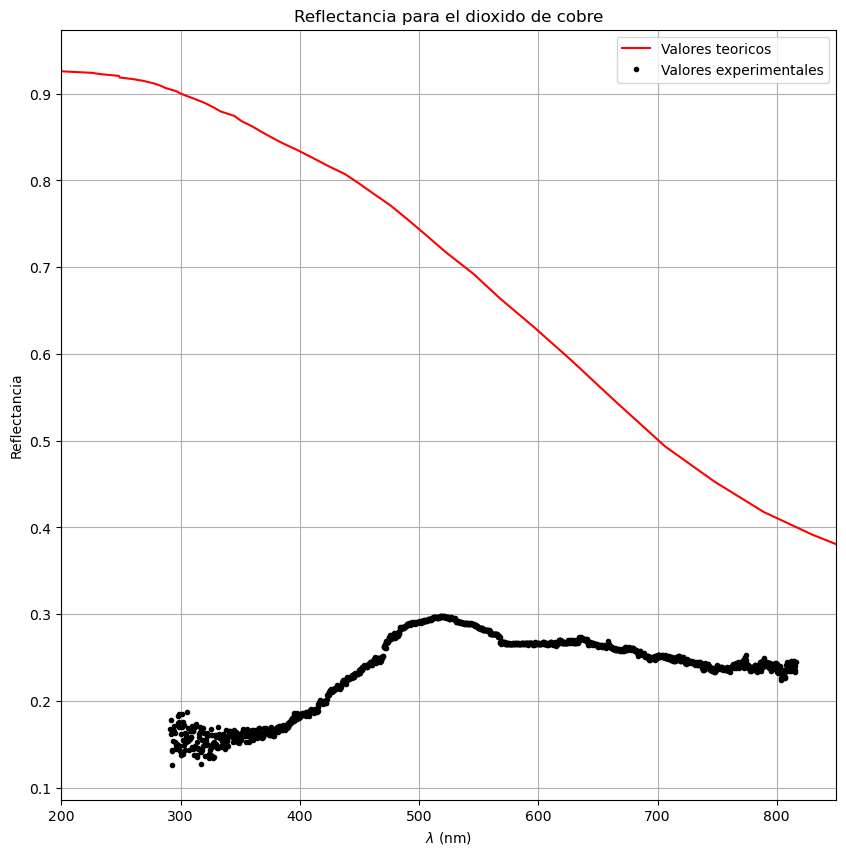

In [12]:
f = np.loadtxt("Dcobre.txt")
f_dcobre = f
r = reflectancia_teorica(f.T[1],f.T[2])
graficador_reflectancia(wld,R3,f.T[0],r,nombre="Reflectancia para el dioxido de cobre")

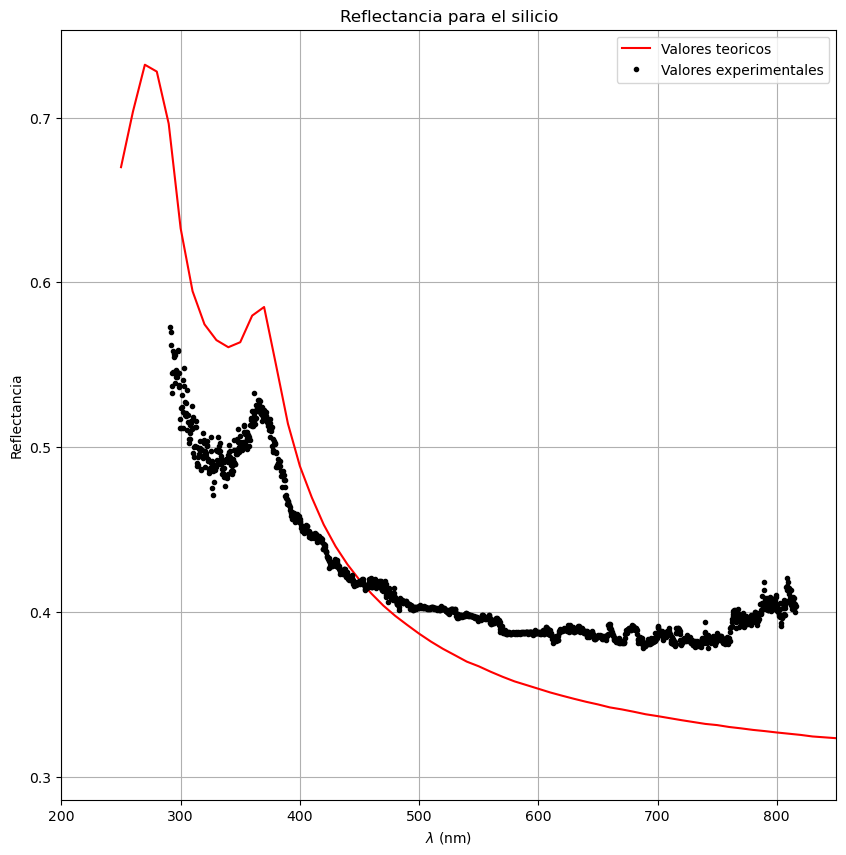

In [13]:
f = np.loadtxt("Si.txt")
f_silicio = f 
r = reflectancia_teorica(f.T[1],f.T[2])
graficador_reflectancia(wld,R4,f.T[0]*1000,r,nombre="Reflectancia para el silicio")

In [34]:
def funcion(wld,R):
	wn2d = 1/wld[::-1]
	lnr = np.log(R)/2
	dn = np.zeros(len(wn2d))
	h = wn2d[1] - wn2d[0]
	for ii in range(len(wn2d)): 
		if(ii%2 == 0): 
			f = 0 
			for jj in range(1,len(wn2d),2): 
				f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)
		else: 
			f = 0 
			for jj in range(0,len(wn2d),2): 
				f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)
		
		dn[ii] = 2*2*h/np.pi*f
		phaser = -dn
	nn=(1-R**2)/(1+R**2-2*R*np.cos(phaser))
	kk=2*R*np.sin(phaser)/(1+R**2-2*R*np.cos(phaser))
	return nn,kk

def graficador(n,k,f,lon,nombre='Inserte el nombre del grafico'): 
    plt.figure(figsize=(10,7))
    plt.plot(f.T[0]*1000,f.T[1],"#ff0000",label='n teorico')
    plt.plot(f.T[0]*1000,f.T[2],"#00ff00",label='k teorico')
    plt.plot(lon,n,'r.',label='n experimental')
    plt.plot(lon,k,'g.',label='k experimental')
    #plt.plot(lon,n,'.',"#0000ff",label='n experimental')
    #plt.plot(lon,k,'.',"#00ff00",label='k experimental')
    plt.xlim(250,900)
    plt.title(nombre)
    plt.legend()
    plt.xlabel("$\lambda$ (nm)")
    plt.grid()
    plt.show()
    
def graficador_2(n,k,f1,f2,f3,lon,nombre="Inserte el nombre del grafico"): 
    fig, axs = plt.subplots(2,figsize=(10,7))
    fig.suptitle(nombre)
    axs[0].plot(f1,f2,"#ff0000",label='n teorico')
    axs[0].plot(lon,n,'r.',label='n experimental')
    axs[0].legend()
    axs[0].grid()
    axs[1].plot(f1,f3,"#00ff00",label='k teorico')
    axs[1].plot(lon,k,'g.',label='k experimental')
    axs[1].legend()
    axs[1].grid()
    axs[1].set_xlabel("$\lambda$ (nm)")
    axs[0].set_ylabel("indice de refracción (n)")
    axs[1].set_ylabel("coeficiente de extinción (k)")
    axs[0].set_xlim(250,900)
    axs[1].set_xlim(250,900)
    plt.savefig(nombre + ".jpg")
    plt.show()
    

In [35]:
n1,k1 = funcion(wld,R1)
n2,k2 = funcion(wld,R2)
n3,k3 = funcion(wld,R3)
n4,k4 = funcion(wld,R4)

# Graficos de reflectancia para 4 materiales diferentes. 

Se realiza a partir e 

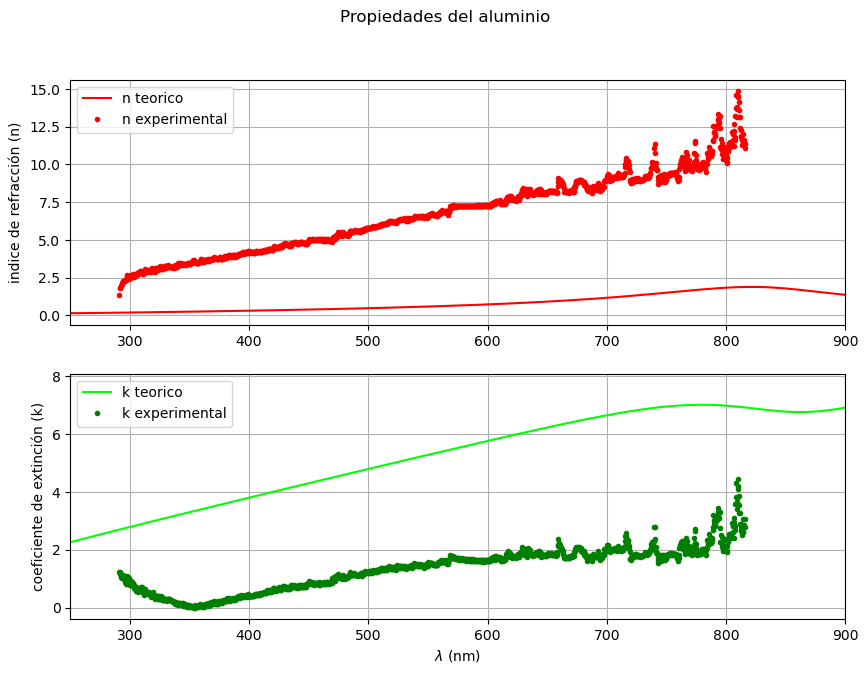

In [36]:
#f_aluminio.T[0] = f_aluminio.T[0]*1000
f1 = f_aluminio.T[0]*1000
f2 = f_aluminio.T[1]
f3 = f_aluminio.T[2]
graficador_2(n1,abs(k1),f1,f2,f3,wld,nombre='Propiedades del aluminio')

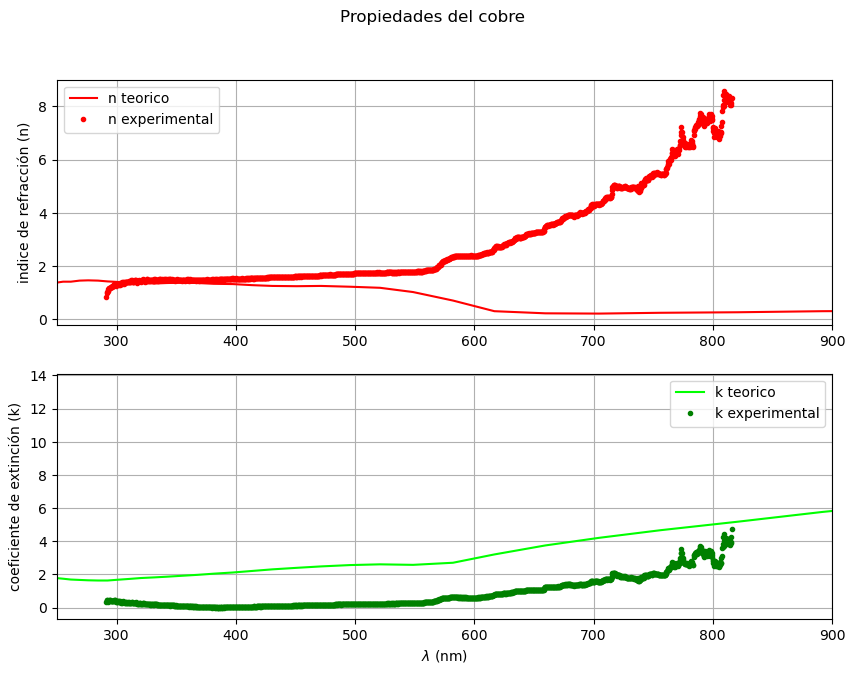

In [37]:
f1 = f_cobre.T[0]*1000
f2 = f_cobre.T[1]
f3 = f_cobre.T[2]
graficador_2(n2,abs(k2),f1,f2,f3,wld,nombre='Propiedades del cobre')

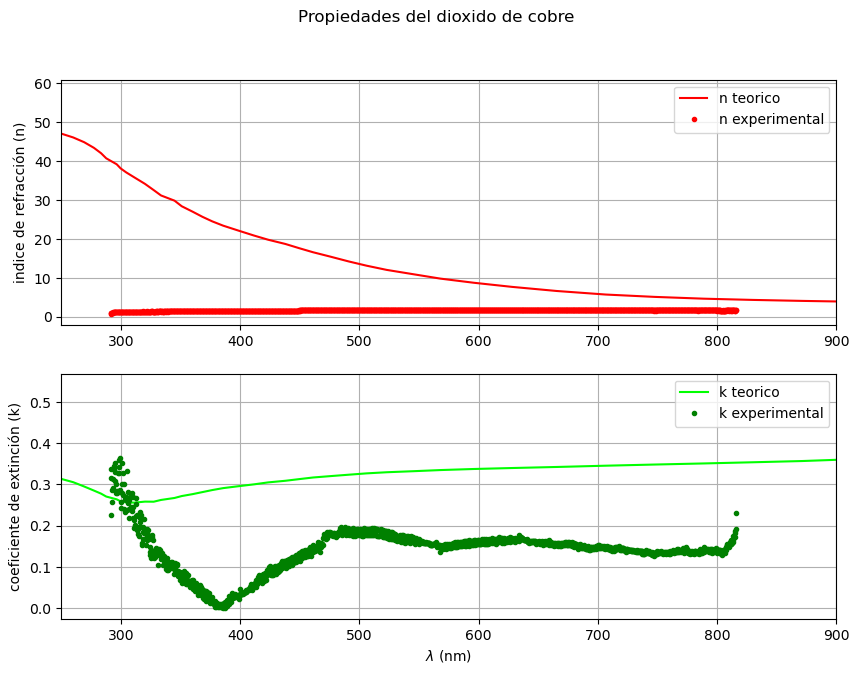

In [38]:
f1 = f_dcobre.T[0]
f2 = f_dcobre.T[1]
f3 = f_dcobre.T[2]
graficador_2(n3,abs(k3),f1,f2,f3,wld,nombre='Propiedades del dioxido de cobre')

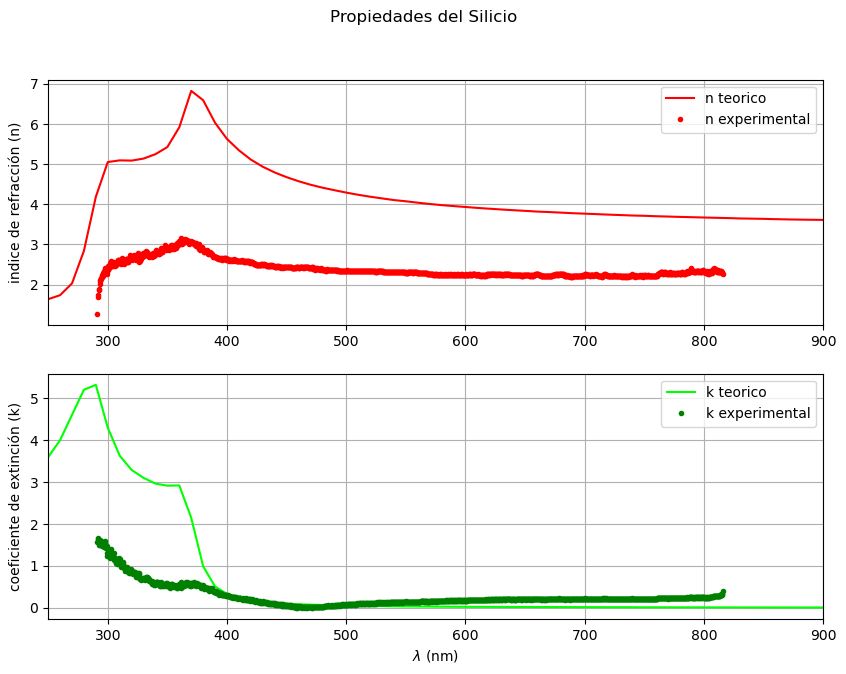

In [39]:
f1 = f_silicio.T[0]*1000
f2 = f_silicio.T[1]
f3 = f_silicio.T[2]
graficador_2(n4,abs(k4),f1,f2,f3,wld,nombre='Propiedades del Silicio')